In [1]:
%load_ext autoreload
%autoreload 3

In [2]:
import logging
import pandas as pd
import numpy as np
import pylab as pl

from cnaster.config import JSONConfig
from cnaster.io import get_spots, get_meta, get_umis
from cnaster.sim.io import get_truth

In [3]:
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(name)s - %(levelname)s - %(filename)s:%(lineno)d - %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S",
)

logger = logging.getLogger(__name__)

# NOTES
- current sim. configuration assumes tumor purity of unity

In [4]:
run_id = 0
cpath = "/Users/mw9568/repos/cnaster/sim_config.json"
sample_name = "cnaster_002"

config = JSONConfig.from_file(cpath)

In [5]:
meta = get_meta(config, run_id, sample_name)
truth = get_truth(config, run_id, sample_name)
spots = get_spots(config, run_id, sample_name)

df = pd.merge(spots, meta, on="barcode")
df = pd.merge(df, truth, on="barcode")
df

2025-06-17 09:41:48 - cnaster.io - INFO - io.py:13 - Reading spots from /Users/mw9568/scratch/cnaster/run0/cnaster_002/cnaster_002_visium.tsv.gz


,barcode,x,y,z,umis,snp_umis,clone,tumor_purity
0,VIS00000,-15.0,0.000000,2.5,3886,441,-1,0.0
1,VIS00001,-14.0,0.000000,2.5,2379,360,-1,0.0
2,VIS00002,-13.0,0.000000,2.5,3432,523,-1,0.0
3,VIS00003,-12.0,0.000000,2.5,2745,257,-1,0.0
4,VIS00004,-11.0,0.000000,2.5,5907,461,-1,0.0
...,...,...,...,...,...,...,...,...
4895,VIS04895,84.5,59.755753,2.5,2687,567,2,1.0
4896,VIS04896,85.5,59.755753,2.5,3621,261,2,1.0
4897,VIS04897,86.5,59.755753,2.5,3291,634,2,1.0
4898,VIS04898,87.5,59.755753,2.5,2329,504,2,1.0


In [6]:
umis = get_umis(config, run_id, sample_name)
umis.shape

(2, 4900, 2181)

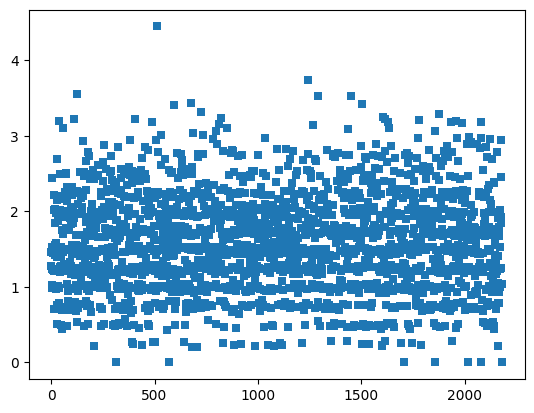

In [7]:
segments = np.arange(umis.shape[-1])
isin = df["clone"] == 3

x = np.tile(segments, np.sum(isin))
y = np.mean(umis[0, isin, :], axis=0)

pl.scatter(segments, y, marker=",", lw=0.0)

(0.0, 350.0)

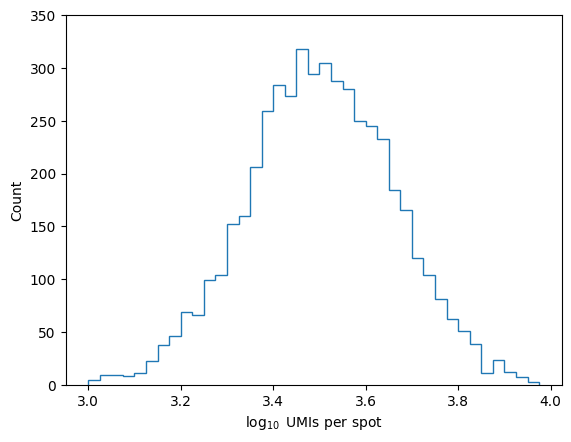

In [8]:
pl.hist(np.log10(df["umis"]), histtype="step", bins=np.arange(3.0, 4.0, 0.025))

pl.xlabel(r"$\log_{10}$ UMIs per spot")
pl.ylabel(r"Count")

pl.ylim(0, 350.0)

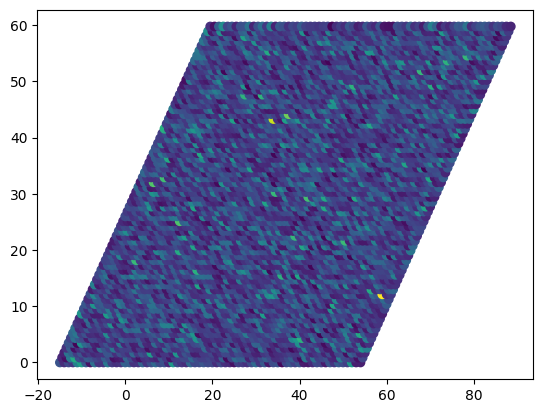

In [9]:
pl.scatter(df["x"], df["y"], c=df["umis"])

(0.0, 350.0)

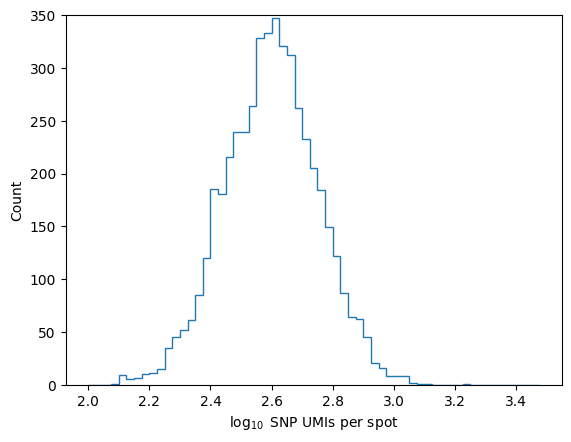

In [10]:
pl.hist(np.log10(df["snp_umis"]), histtype="step", bins=np.arange(2.0, 3.5, 0.025))

pl.xlabel(r"$\log_{10}$ SNP UMIs per spot")
pl.ylabel(r"Count")

pl.ylim(0, 350.0)

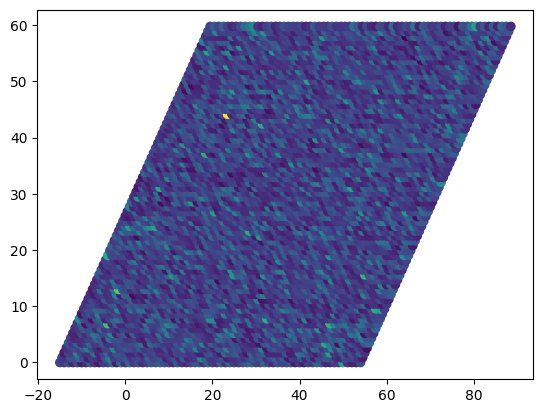

In [11]:
pl.scatter(df["x"], df["y"], c=df["snp_umis"])

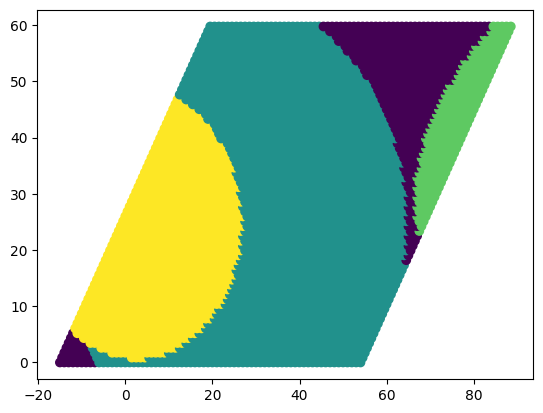

In [12]:
pl.scatter(df["x"], df["y"], c=df["clone"])

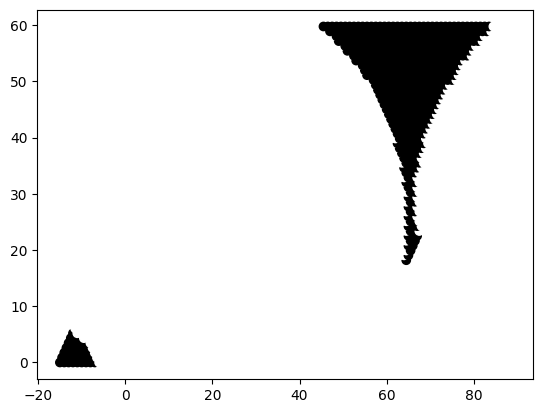

In [13]:
pl.scatter(df["x"], df["y"], c=df["tumor_purity"], cmap="gray", vmin=0.0, vmax=1.0)

# Done.